# CSE475 HW2 Problem 4: Linear Regression and Gradient Descent

## Introduction

This problem uses the fish length dataset for linear regression which aims to predict length of fish. The fish length dataset has 44 rows of fish data with index, age of the fish, temperature of the water and the fish length as columns.



In [4]:
from __future__ import print_function
import os

* Import the data using Pandas and examine the shape. There are 3 feature columns plus the predictor, the fish length (`Length of fish`).

In [5]:
import pandas as pd
import numpy as np

# Import the data using the file path
filepath = 'Fish_Length.csv'
data = pd.read_csv(filepath, sep=',')

print(data.shape)

(44, 4)


* Drop the Index as it it is not required for predictions.

In [6]:
# Select the object (string) columns
data.drop('Index', axis=1, inplace=True)
data.shape

(44, 3)

* Create train and test splits of dataset. 
* Scale the parameters using MinMaxScaler

In [7]:
from sklearn.model_selection import train_test_split

y_col = 'Length of fish'

# Split the data that is not one-hot encoded
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)

# Converting Pandas to Numpy
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35, 2) (9, 2) (35,) (9,)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Question 1 ( 2pts)

The linear regression model considered in this assignment is y = W<sup>T</sup>x + b. y is the outcome, and x is a data point (a 2 by 1 column vector containing two features) . W is a 2 by 1 column vector, b is scalar which is called intercept. We will learn intercept in the linear regression model, so please set fit_intercept=True. Please do the following tasks:

* Fit a basic linear regression model on the training data (X_train, y_train) using Scikit-learn and print W and b. 
* Calculate and print the root mean squared error (not mean squared error) on both the train and test sets.

Hint: the necessary packages have been imported for your convenience. You do not need to import additional packages. You can use np.sqrt(mean_squared_error(...)) (or call mean_squared_error with squared=False) to compute the root mean squared error.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, y_train)

train_out = lr_model.predict(X_train)
test_out = lr_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_out))
test_rmse = np.sqrt(mean_squared_error(y_test, test_out))

print("Training MSE:", train_rmse)
print("Testing MSE:", test_rmse)

Training MSE: 544.0538592127398
Testing MSE: 745.1196499708205


## Question 2 (2pts)

We can follow the following steps to compute closed-form solutions for W and b. 

1) Append a new column to X_train and all elements of this new column is 1. Name the obtained extended trainning data X.  The new column is the righmost column of X.

2) Calculate the coefficients W_ using the equation below:

W_ = (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>Y, where Y is Y_train. <br>

Then W is the first two elements of W_ and b is the last element of W_.

Print W and b. The obtained W and b should match the results obtained from scikit-learn model.

In [14]:

X_ext = np.column_stack([X_train, np.ones(X_train.shape[0])])
y_reshaped = y_train.reshape(-1, 1)

coeffs = np.linalg.pinv(X_ext.T @ X_ext) @ X_ext.T @ y_reshaped

weights_c = coeffs[:-1].ravel()
bias_c = coeffs[-1, 0]

print("Weights :", weights_c)
print("Bias :", bias_c)


Weights : [1185.27174796 -335.04454342]
Bias : 3051.7714285714287


## Question 3 (6pts)
Initialize W and b as random variables following normal distribution with mean 0 and variance 1. Use gradient descent for n epochs [10<n<100] (i.e., n iterations) with a suitable learning rate of your choice to find the optimal W* and b* and print them. W* and b* should be similar to the W and b obtained from above two methods but may not be exactly the same due to numerical erros.

### Hint:

The cost function for linear regression for this question is as follows:

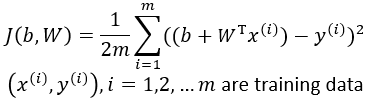

The partial derivatives of the cost function with respect to b and W are given below for your reference:

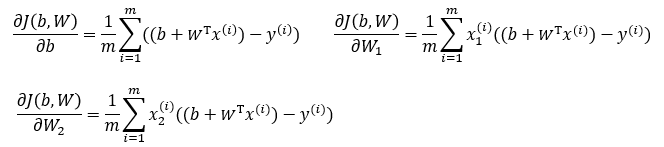

The gradient descent algorithm you need to implement is almost the same as that on slide 36 of lecture 8 (the only difference is that slide 36 is for one-dimensional feature), and the procedure is listed below for your reference:

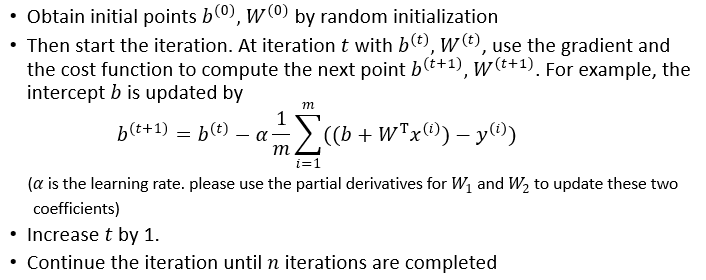

You can set the learning rate to 1,0.1,0.01,..., and see which value works best for you.

In [15]:
import numpy as np

np.random.seed(7)

weights = np.random.normal(loc=0, scale=0.5, size=X_train.shape[1])
bias = 0.0
learning_rate = 0.005
epochs = 100

for _ in range(epochs):
    predictions = X_train @ weights + bias
    errors = predictions - y_train
    
    grad_w = (X_train.T @ errors) / X_train.shape[0]
    grad_b = errors.mean()
    
    weights -= learning_rate * grad_w
    bias   -= learning_rate * grad_b

print("Estimated Weights:", weights)
print("Estimated Bias:", bias)


Estimated Weights: [ 464.4741324  -120.81747943]
Estimated Bias: 1203.0985182157808
